# MODELLING AND EVALUATION NOTEBOOK

## Objectives
The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

Images are uniform in size (256x256 pixels) due to resizing during preprocessing.
    25 epochs are set for training.
    Batch size of 20.
    Data Augmentation:  during training, ImageDataGenerator  will be used to artificially expand the training dataset with variations of the images (e.g., rotation, shifting, flipping).

## INPUTS

project5_cherryleaves/jupyter_notebooks/inputs/train project5_cherryleaves/jupyter_notebooks/inputs/test project5_cherryleaves/jupyter_notebooks/inputs/validation image shape embeddings

## OUTPUTS

Images distribution plot in train, validation, and test set
Image augmentation
Class indices to change prediction inference in labels
Machine learning model creation and training
Save model
Learning curve plot for model performance
Model evaluation on pickle file
Prediction on the random image file

## Import Libraries and Set Up Directories

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Define directories for train, validation, and test sets
my_data_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/inputs'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

print("Train directory:", train_path)
print("Validation directory:", val_path)
print("Test directory:", test_path)


Current working directory: /workspace/project5_cherryleaves/jupyter_notebooks
Train directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/train
Validation directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/validation
Test directory: /workspace/project5_cherryleaves/jupyter_notebooks/inputs/test


## Visualize Dataset Distribution

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


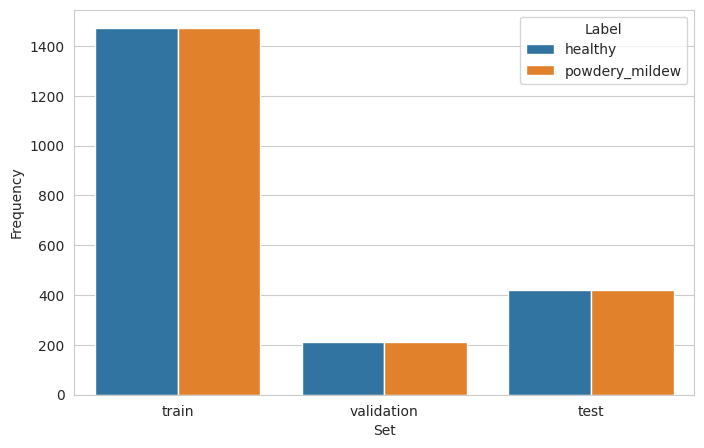

In [3]:

df_freq = pd.DataFrame([])

for folder in ['train', 'validation', 'test']:
    for label in os.listdir(os.path.join(my_data_dir, folder)):
        num_images = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        df_freq = df_freq.append(pd.Series({
            'Set': folder,
            'Label': label,
            'Frequency': num_images
        }), ignore_index=True)
        print(f"* {folder} - {label}: {num_images} images")


sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
save_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/modelling'


if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(f'{save_dir}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()



## Set Up ImageDataGenerators for Augmentation and Data Loading

In [4]:
# Define batch size and image shape
batch_size = 20
image_shape = (256, 256, 3)

# ImageDataGenerator for augmentation on training set
augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

# ImageDataGenerator for validation and test sets (no augmentation)
validation_image_data = ImageDataGenerator(rescale=1./255)
test_image_data = ImageDataGenerator(rescale=1./255)


##  Flow from Directory for Validation and Test Sets

In [5]:
# Flow from directory for validation and test sets
validation_set = validation_image_data.flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_set = test_image_data.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.


## Flow from Directory for Augmented Training Set

In [6]:
# Flow from directory for augmented training set
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)


Found 2944 images belonging to 2 classes.


## Display Class Indices and Visualize Sample Images

Train Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}
Validation Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}
Test Set Class Indices: {'healthy': 0, 'powdery_mildew': 1}
Sample images for class 'healthy':
Image Shape: (20, 256, 256, 3)


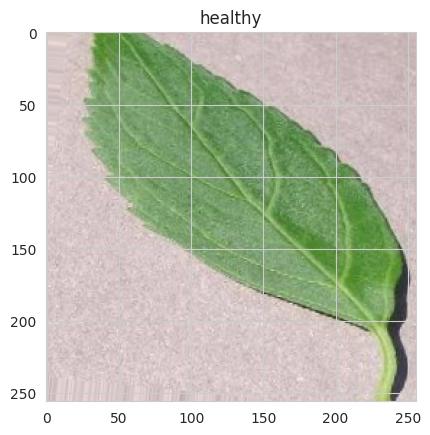

Image Shape: (20, 256, 256, 3)


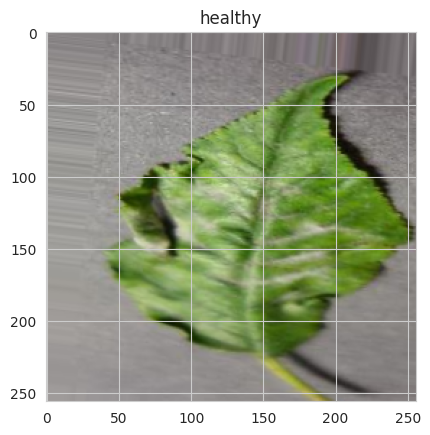

Image Shape: (20, 256, 256, 3)


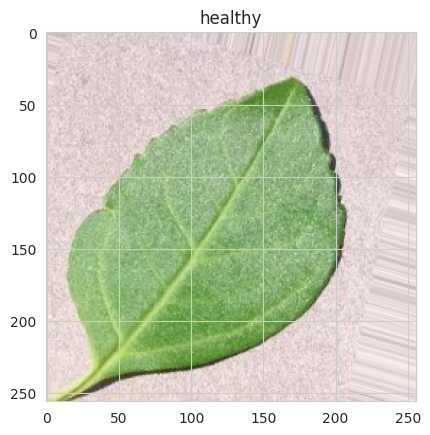

Sample images for class 'powdery mildew':
Image Shape: (20, 256, 256, 3)


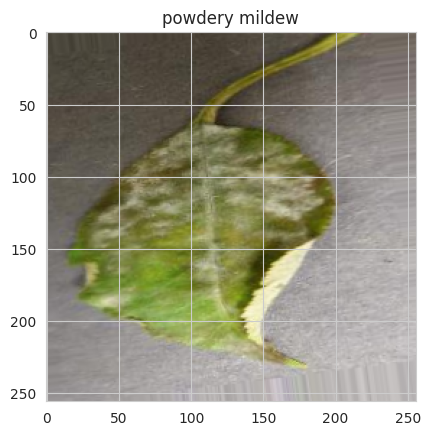

Image Shape: (20, 256, 256, 3)


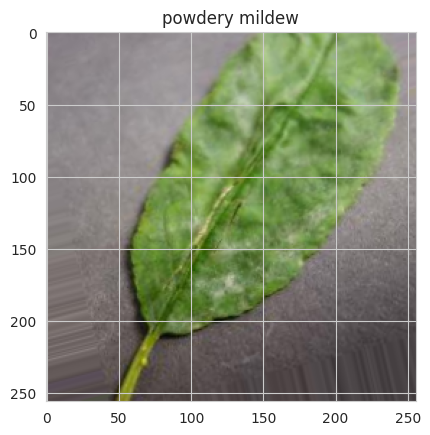

Image Shape: (20, 256, 256, 3)


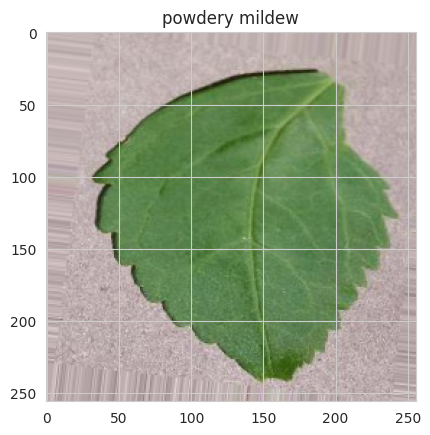

Sample images for class 'healthy':
Image Shape: (20, 256, 256, 3)


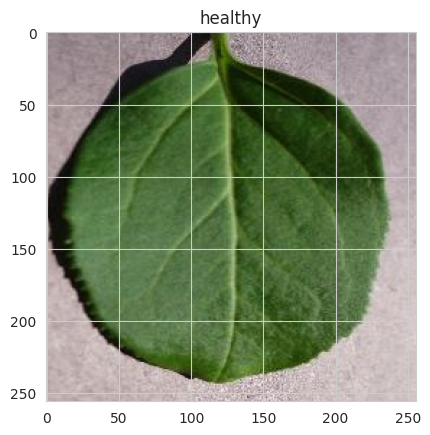

Image Shape: (20, 256, 256, 3)


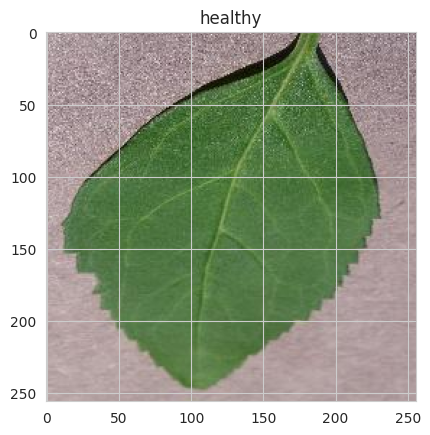

Image Shape: (20, 256, 256, 3)


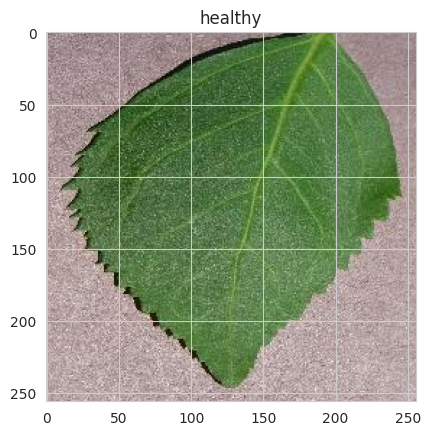

Sample images for class 'powdery mildew':
Image Shape: (20, 256, 256, 3)


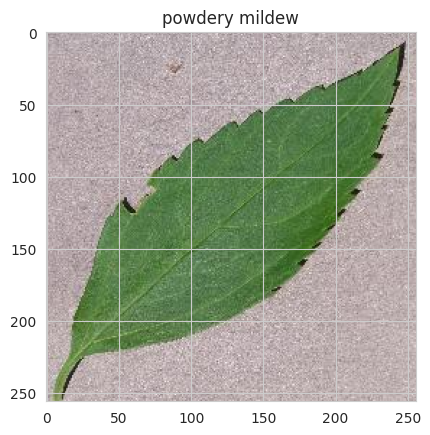

Image Shape: (20, 256, 256, 3)


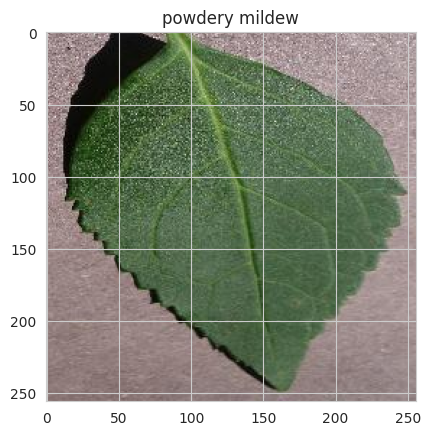

Image Shape: (20, 256, 256, 3)


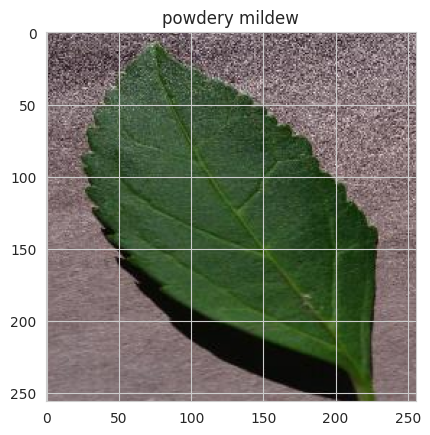

Sample images for class 'healthy':
Image Shape: (20, 256, 256, 3)


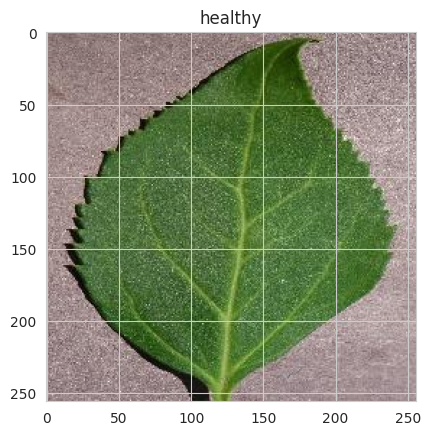

Image Shape: (20, 256, 256, 3)


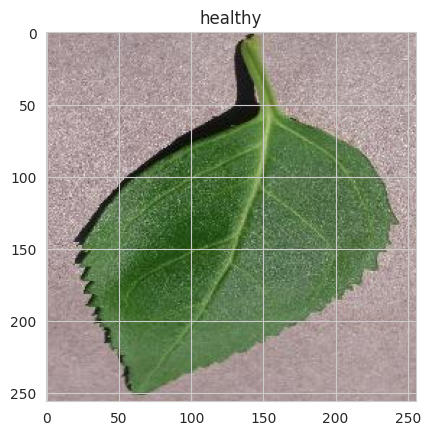

Image Shape: (20, 256, 256, 3)


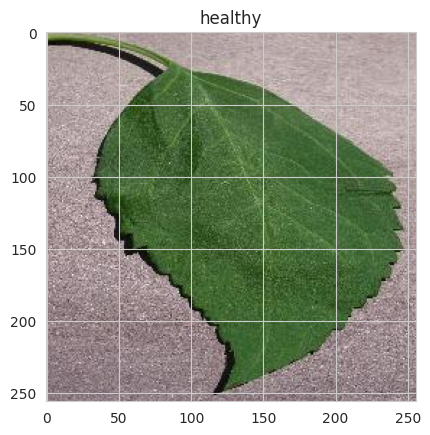

Sample images for class 'powdery mildew':
Image Shape: (20, 256, 256, 3)


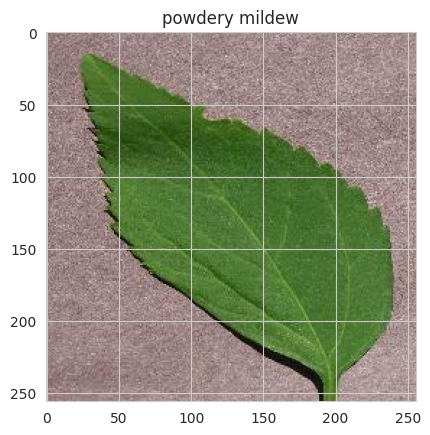

Image Shape: (20, 256, 256, 3)


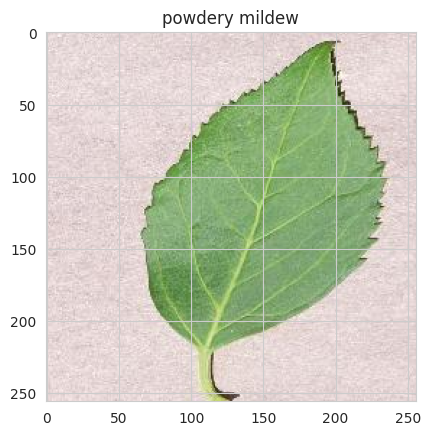

Image Shape: (20, 256, 256, 3)


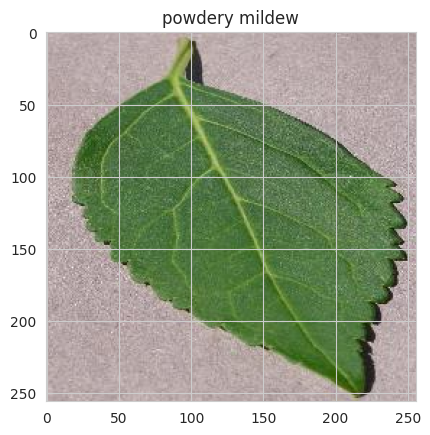

In [7]:
# Display class indices for train, validation, and test sets
print("Train Set Class Indices:", train_set.class_indices)
print("Validation Set Class Indices:", validation_set.class_indices)
print("Test Set Class Indices:", test_set.class_indices)

def visualize_sample_images(data_generator, num_samples=3):
    class_labels = ['healthy', 'powdery mildew']  
    for label_idx, label in enumerate(class_labels):
        print(f"Sample images for class '{label}':")
        for _ in range(num_samples):
            img, _ = data_generator.next()
            print("Image Shape:", img.shape)
            plt.imshow(img[0])
            plt.title(label)
            plt.show()

# Visualize sample images for training, validation, and test sets
visualize_sample_images(train_set)
visualize_sample_images(validation_set)
visualize_sample_images(test_set)


## Save Class Indices and Set Up Model

Creating TensorFlow model...
Model created successfully.

Training the model...
Epoch 1/25
147/147 [==============================] - 160s 1s/step - loss: 0.3542 - accuracy: 0.8287 - val_loss: 0.0783 - val_accuracy: 0.9929
Epoch 2/25
147/147 [==============================] - 168s 1s/step - loss: 0.1114 - accuracy: 0.9627 - val_loss: 0.3503 - val_accuracy: 0.8310
Epoch 3/25
147/147 [==============================] - 161s 1s/step - loss: 0.1518 - accuracy: 0.9511 - val_loss: 0.0376 - val_accuracy: 0.9857
Epoch 4/25
147/147 [==============================] - 160s 1s/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0496 - val_accuracy: 0.9881
Epoch 5/25
147/147 [==============================] - 175s 1s/step - loss: 0.0488 - accuracy: 0.9829 - val_loss: 0.0762 - val_accuracy: 0.9810
Epoch 6/25
147/147 [==============================] - 158s 1s/step - loss: 0.0268 - accuracy: 0.9908 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/25
147/147 [==============================] - 158s 1s/

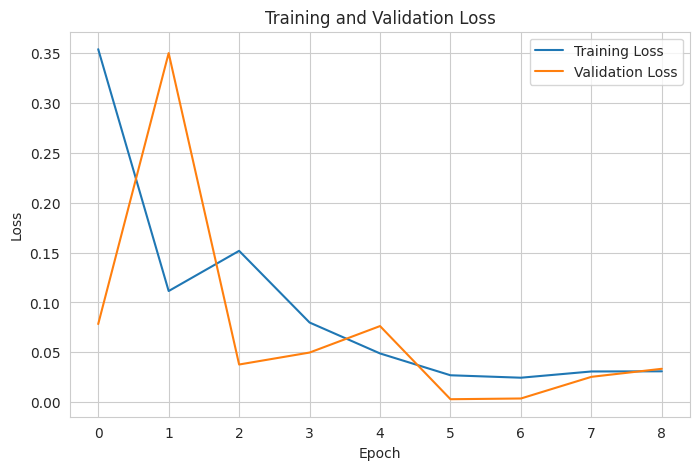


Plotting model training accuracy...


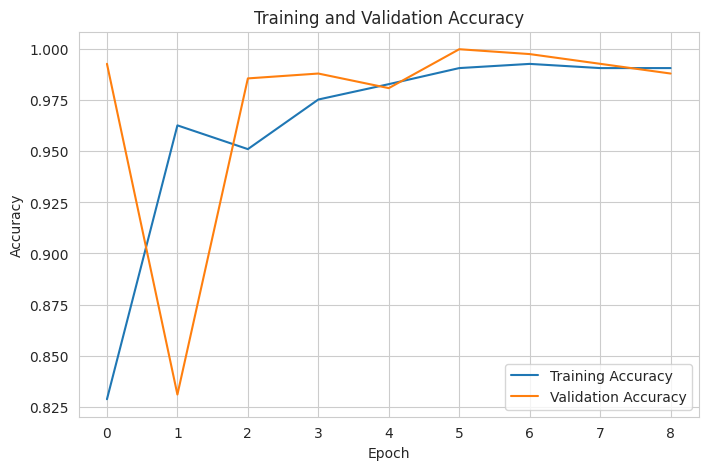

In [11]:

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Image shape and batch size
image_shape = (256, 256, 3)
batch_size = 20


save_dir = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/image_augmentation'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)



joblib.dump(value=train_set.class_indices, filename=os.path.join(save_dir, 'class_indices.pkl'))

#  model architecture
def create_tf_model():
    print("Creating TensorFlow model...")
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Model created successfully.")
    return model


model = create_tf_model()


early_stop = EarlyStopping(monitor='val_loss', patience=3)

print("\nTraining the model...")
history = model.fit(
    train_set,
    epochs=25,
    steps_per_epoch=len(train_set.classes) // batch_size,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1
)
print("Model training completed.")

# Save the trained model
model_save_path = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/model/'
if not os.path.exists(model_save_path):
    os.makedirs(model_save_path)

model.save(os.path.join(model_save_path, 'cherry_leaves_model.h5'))
print("Model saved successfully.")

# Optionally, save training history for later analysis
history_save_path = '/workspace/project5_cherryleaves/jupyter_notebooks/outputs/history/'
if not os.path.exists(history_save_path):
    os.makedirs(history_save_path)

history_df = pd.DataFrame(history.history)
history_df.to_csv(os.path.join(history_save_path, 'training_history.csv'), index=False)
print("Training history saved successfully.")

# Plot training history
print("\nPlotting model training losses...")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(os.path.join(history_save_path, 'training_validation_loss.png'), bbox_inches='tight', dpi=150)
plt.show()

print("\nPlotting model training accuracy...")
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(os.path.join(history_save_path, 'training_validation_accuracy.png'), bbox_inches='tight', dpi=150)
plt.show()


Conclusion:
The training process resulted in a well-performing model for classifying cherry leaves into categories 
(likely healthy vs. powdery mildew), achieving high accuracy and low loss on both training and validation sets. 
The use of data augmentation helped in improving model robustness, and early stopping was applied to prevent
overfitting.


## Define and Compile the TensorFlow Model

In [12]:
def create_tf_model():
    print("Creating TensorFlow model...")
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))  # Two classes: powdery mildew and healthy
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("Model created successfully.")
    return model

print("Model Summary:")
create_tf_model().summary()


Model Summary:
Creating TensorFlow model...
Model created successfully.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
________________________________________________

 ## Prepare Data Generators and Train the Model

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

print("\nLoading data generators...")
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=True
)

validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',  
    shuffle=False
)

print("Data generators loaded successfully.")
print("\nTraining the model...")
model = create_tf_model()
history = model.fit(
    train_set,
    epochs=25,
    steps_per_epoch=len(train_set.classes) // batch_size,
    validation_data=validation_set,
    callbacks=[early_stop],
    verbose=1
)
print("Model training completed.")



Loading data generators...
Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Data generators loaded successfully.

Training the model...
Creating TensorFlow model...
Model created successfully.
Epoch 1/25
147/147 [==============================] - 231s 2s/step - loss: 0.3413 - accuracy: 0.8417 - val_loss: 0.0558 - val_accuracy: 0.9881
Epoch 2/25
147/147 [==============================] - 174s 1s/step - loss: 0.0711 - accuracy: 0.9808 - val_loss: 0.0348 - val_accuracy: 0.9881
Epoch 3/25
147/147 [==============================] - 174s 1s/step - loss: 0.0658 - accuracy: 0.9788 - val_loss: 6.4800e-04 - val_accuracy: 1.0000
Epoch 4/25
147/147 [==============================] - 181s 1s/step - loss: 0.0539 - accuracy: 0.9860 - val_loss: 0.1116 - val_accuracy: 0.9881
Epoch 5/25
147/147 [==============================] - 159s 1s/step - loss: 0.0221 - accuracy: 0.9945 - val_loss: 0.0346 - val_accuracy: 0.9857
Epoch 6/25
147/147 [==============================] -

## Save and Visualize Model Training Results


Saving the model...
Model saved successfully.

Plotting model training losses...


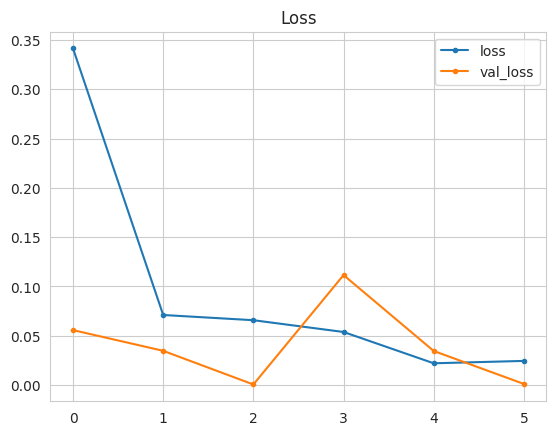


Plotting model training accuracy...


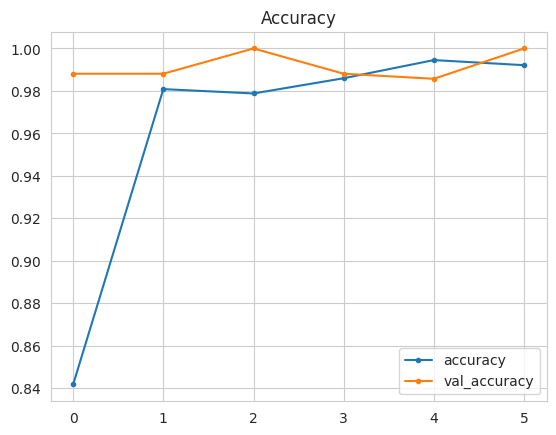

In [14]:
print("\nSaving the model...")
model.save('/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/cherry_leaves_model.keras')
print("Model saved successfully.")

import pandas as pd

print("\nPlotting model training losses...")
losses = pd.DataFrame(history.history)
sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig('/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\nPlotting model training accuracy...")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig('/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()


## Load Saved Model and Make Predictions


Loading a saved model for prediction...
Model loaded successfully.
Image shape: (256, 256), Image mode: RGB


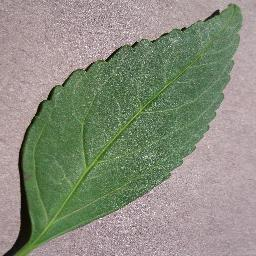

In [15]:
print("\nLoading a saved model for prediction...")
model = tf.keras.models.load_model('/workspace/project5_cherryleaves/jupyter_notebooks/outputs/v1/cherry_leaves_model.keras')
print("Model loaded successfully.")

from tensorflow.keras.preprocessing import image

labels = ["healthy", "powdery_mildew"]

# Load a specific image for prediction
pointer = 66 
label = labels[0]  # Assuming "healthy" is the first class in your labels list

# Load the image and display it
pil_image = image.load_img(
    os.path.join(test_path, label, os.listdir(os.path.join(test_path, label))[pointer]),
    target_size=image_shape[:2],
    color_mode='rgb'
)
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image


In [ ]:
Convert Image and Make Predictions

In [16]:
# Convert image to array and prepare for prediction
print("\nConverting image to array and preparing for prediction...")
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0) / 255
print("Image converted and prepared for prediction successfully.")

# Predict class probabilities
print("\nPredicting class probabilities...")
pred_proba = model.predict(my_image)[0]  
predicted_class_index = np.argmax(pred_proba)
predicted_class = labels[predicted_class_index]
pred_probability = pred_proba[predicted_class_index]

print(f"Predicted Probability: {pred_probability}")
print(f"Predicted Class: {predicted_class}")



Converting image to array and preparing for prediction...
Image converted and prepared for prediction successfully.

Predicting class probabilities...
Predicted Probability: 0.9999568462371826
Predicted Class: healthy


## Git add, commit and push

In [1]:
!git add .

In [2]:
!git commit -m "redoing the code for the modelling of cherry leaves"

[main 13480312] redoing the code for the modelling of cherry leaves
 11 files changed, 6340 insertions(+), 6891 deletions(-)
 create mode 100644 jupyter_notebooks/outputs/history/training_history.csv
 create mode 100644 jupyter_notebooks/outputs/history/training_validation_accuracy.png
 create mode 100644 jupyter_notebooks/outputs/history/training_validation_loss.png
 create mode 100644 jupyter_notebooks/outputs/image_augmentation/class_indices.pkl
 create mode 100644 jupyter_notebooks/outputs/model/cherry_leaves_model.h5
 create mode 100644 jupyter_notebooks/outputs/modelling/labels_distribution.png
 create mode 100644 jupyter_notebooks/outputs/v1/cherry_leaves_model.keras
 create mode 100644 jupyter_notebooks/outputs/v1/model_training_acc.png
 create mode 100644 jupyter_notebooks/outputs/v1/model_training_losses.png


In [3]:
!git push

Enumerating objects: 24, done.
Counting objects: 100% (24/24), done.
Delta compression using up to 16 threads
Compressing objects: 100% (18/18), done.
Writing objects: 100% (20/20), 140.93 MiB | 11.33 MiB/s, done.
Total 20 (delta 3), reused 2 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
remote: warning: See https://gh.io/lfs for more information.
remote: warning: File jupyter_notebooks/outputs/model/cherry_leaves_model.h5 is 85.07 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: File jupyter_notebooks/outputs/v1/cherry_leaves_model.keras is 85.08 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/elena5875/project5_cherryleaves.git
   cc6cf409..13480312  main -> main
